# Loan Approval Prediction

## Task: The goal for this competition is to predict whether an applicant is approved for a loan.

## Evaluation: Submissions are evaluated using the Area under ROC Cruve.

In [1]:
# pip install matplotlib


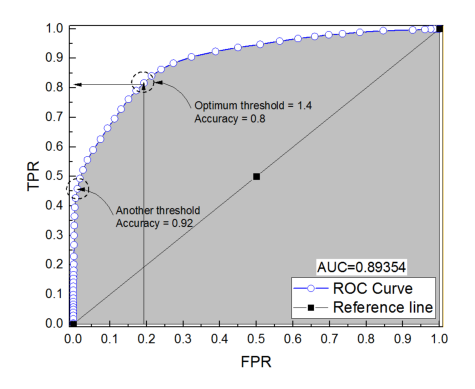

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Use double backslashes or raw string for file path
Eval_Metric = mpimg.imread(r"C:\Users\abudh\Desktop\Loan_Approval\Evalaution Metric.png")

# Display the image
plt.imshow(Eval_Metric)
plt.axis('off')  # Optionally hide the axis
plt.show()


In [3]:
# pip install pandas numpy matplotlib seaborn scikit-learn xgboost catboost


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_hist_gradient_boosting  
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import median_absolute_error
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from matplotlib.patches import ConnectionPatch

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

c:\Users\abudh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [5]:
df_train = pd.read_csv(r"C:\Users\abudh\Desktop\Loan_Approval\train.csv")
df_test = pd.read_csv(r"C:\Users\abudh\Desktop\Loan_Approval\test.csv")
df_sub = pd.read_csv(r"C:\Users\abudh\Desktop\Loan_Approval\sample_submission.csv")

In [6]:
df_origi = pd.read_csv(r"C:\Users\abudh\Desktop\Loan_Approval\credit_risk_dataset.csv")
df_origi.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [7]:
df_origi.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [8]:
df_origi.shape    

(32581, 12)

In [9]:
df_train.columns
df_train.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [10]:
df_train.describe()


,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [11]:
df_test.head()


,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


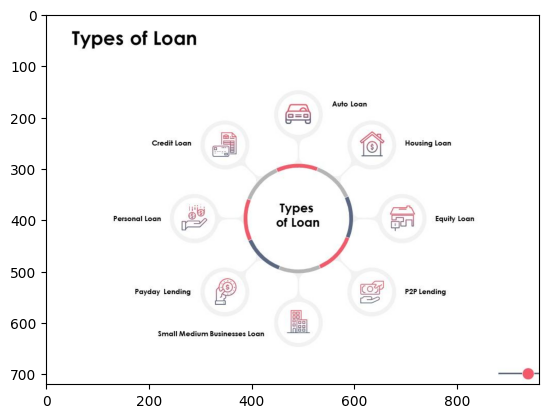

In [12]:
Type_of_loan = mpimg.imread(r"C:\Users\abudh\Desktop\Loan_Approval\Type_of_Load.jpg")
plt.imshow(Type_of_loan)
plt.show()

In [13]:
df_sub.head()

,id,loan_status
0,58645,0.5
1,58646,0.5
2,58647,0.5
3,58648,0.5
4,58649,0.5


In [14]:
print(df_train.columns)
print(df_test.columns)
print(df_origi.columns)

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')
Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length'],
      dtype='object')
Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')


In [15]:
df_train = df_train.drop(columns = ["id"])
df_test = df_test.drop(columns = ["id"])

In [16]:
df_train.shape,df_test.shape


((58645, 12), (39098, 11))

In [17]:
df_train = pd.concat([df_train,df_origi],axis=0)


In [18]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 91226 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  91226 non-null  int64  
 1   person_income               91226 non-null  int64  
 2   person_home_ownership       91226 non-null  object 
 3   person_emp_length           90331 non-null  float64
 4   loan_intent                 91226 non-null  object 
 5   loan_grade                  91226 non-null  object 
 6   loan_amnt                   91226 non-null  int64  
 7   loan_int_rate               88110 non-null  float64
 8   loan_percent_income         91226 non-null  float64
 9   cb_person_default_on_file   91226 non-null  object 
 10  cb_person_cred_hist_length  91226 non-null  int64  
 11  loan_status                 91226 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 9.0+ MB


In [19]:
df_train.isnull().sum()


person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
loan_status                      0
dtype: int64

In [20]:
df_test.isnull().sum()


person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [21]:
"""  
rows_with_missing = df_train[df_train.isnull().any(axis=1)].shape[0]
total_rows = df_train.shape[0]
print(f"Number of rows with missing data: {rows_with_missing}")
print(f"Total number of rows: {total_rows}")

df_train = df_train.dropna()
"""



df_train['person_emp_length'].fillna(df_train['person_emp_length'].mean(), inplace=True)
df_train['loan_int_rate'].fillna(df_train['loan_int_rate'].mean(), inplace=True)

rows_with_missing = df_train[df_train.isnull().any(axis=1)].shape[0]
total_rows = df_train.shape[0]
print(f"Number of rows with missing data: {rows_with_missing}")
print(f"Total number of rows: {total_rows}")

Number of rows with missing data: 0
Total number of rows: 91226


C:\Users\abudh\AppData\Local\Temp\ipykernel_18696\3505551271.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['person_emp_length'].fillna(df_train['person_emp_length'].mean(), inplace=True)
C:\Users\abudh\AppData\Local\Temp\ipykernel_18696\3505551271.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting

The dataset comprises predominantly younger borrowers with moderate income levels. There are indications of potential outliers in the fields of age, employment length, and income. The majority of loans are classified as small to moderate, typically carrying interest rates in the range of 8% to 13%. Notably, approximately 14.2% of the loans in the dataset result in defaults, which may offer valuable insights for assessing default risk. Additionally, the dataset contains a limited number of categorical features, and no missing data is present.








## Exploratory Data Analysis


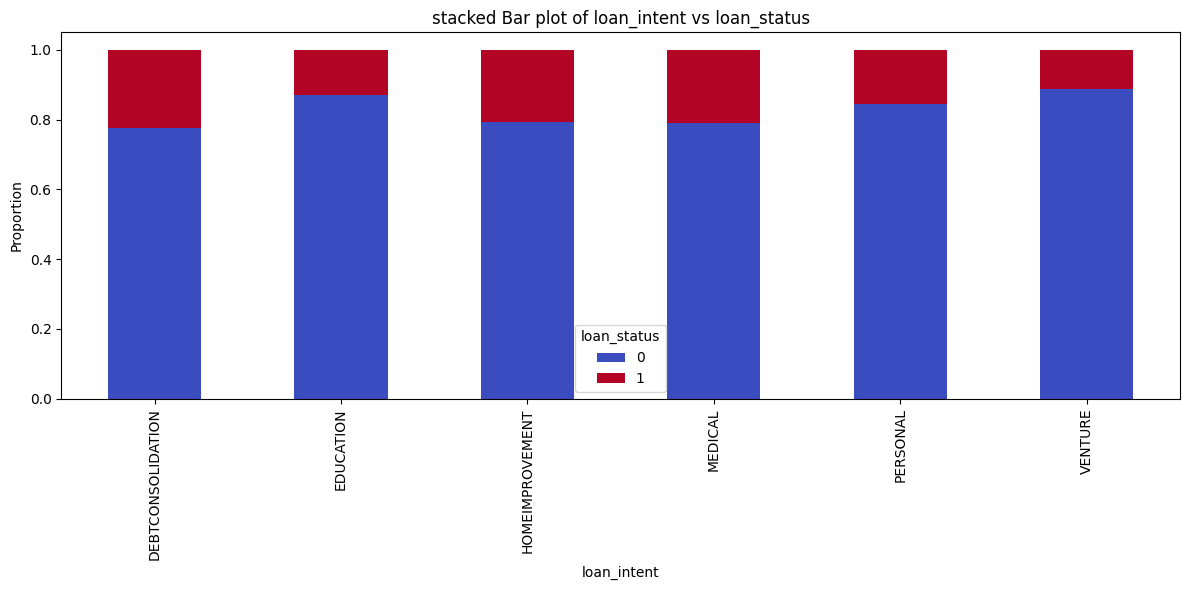

In [22]:
def stacked_bar_plot(df, feature, target='loan_status'):
    crosstab = pd.crosstab(df[feature], df[target], normalize = 'index')
    ax = crosstab.plot(kind= 'bar', stacked = True, figsize =(12,6), cmap='coolwarm')
    
    plt.title (f'stacked Bar plot of {feature} vs {target}')
    plt.ylabel('Proportion')
    plt.xlabel(feature)
    plt.tight_layout()
    plt.show()
    
stacked_bar_plot(df_train, 'loan_intent')



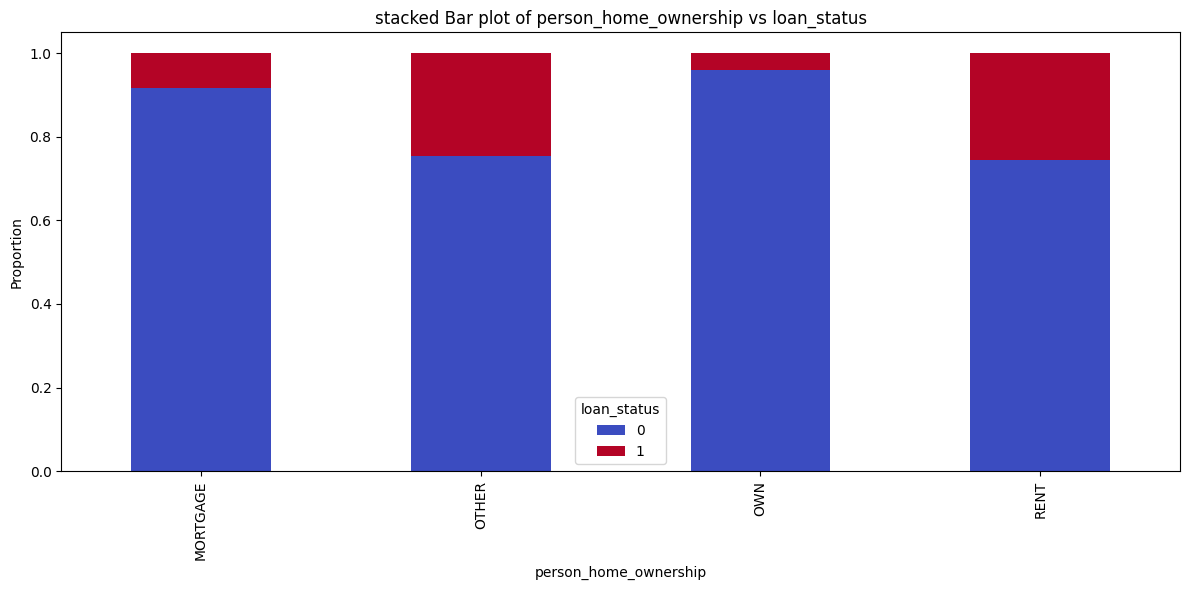

In [23]:
stacked_bar_plot(df_train, 'person_home_ownership')


C:\Users\abudh\AppData\Local\Temp\ipykernel_18696\602785759.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train, x='person_home_ownership', palette= "coolwarm")


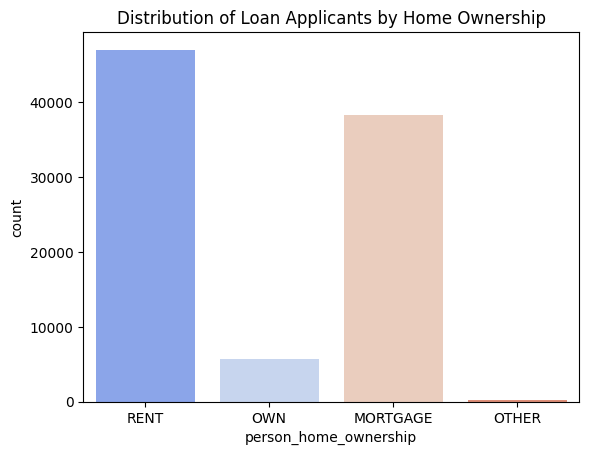

In [24]:
sns.countplot(data=df_train, x='person_home_ownership', palette= "coolwarm")
plt.title('Distribution of Loan Applicants by Home Ownership')
plt.show()

C:\Users\abudh\AppData\Local\Temp\ipykernel_18696\1827645218.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train, x='loan_intent', palette= "coolwarm")


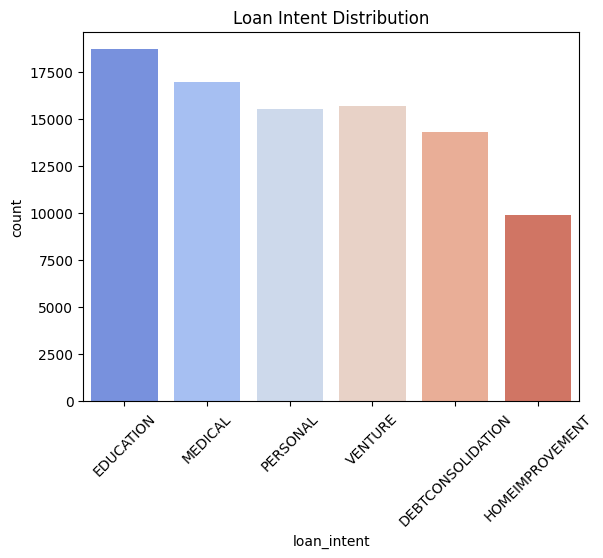

In [25]:
sns.countplot(data=df_train, x='loan_intent', palette= "coolwarm")
plt.title('Loan Intent Distribution')
plt.xticks(rotation=45)
plt.show()

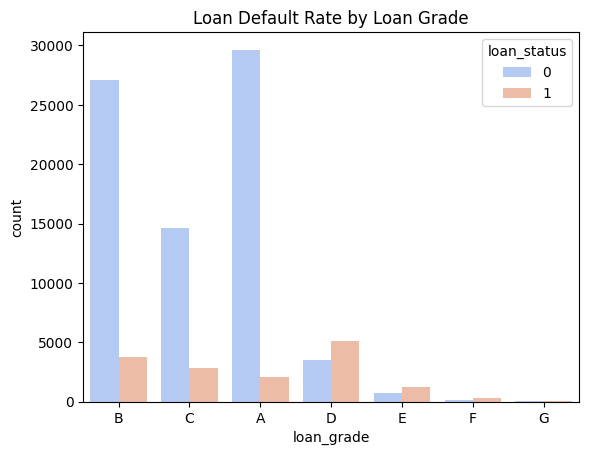

In [26]:
sns.countplot(data=df_train, x='loan_grade', hue='loan_status', palette= "coolwarm")
plt.title('Loan Default Rate by Loan Grade')
plt.show()

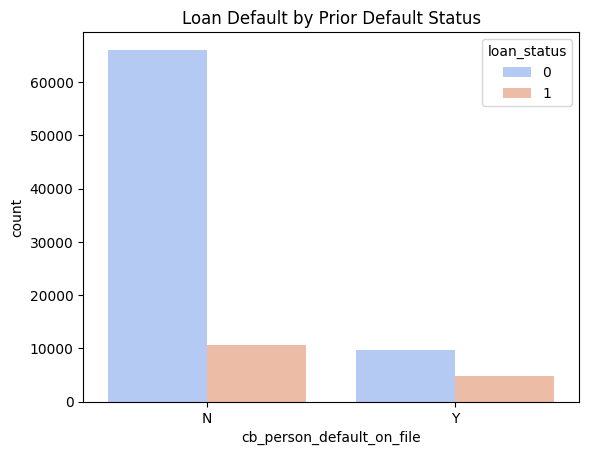

In [27]:
sns.countplot(data=df_train, x='cb_person_default_on_file', hue='loan_status',palette= "coolwarm")
plt.title('Loan Default by Prior Default Status')
plt.show()

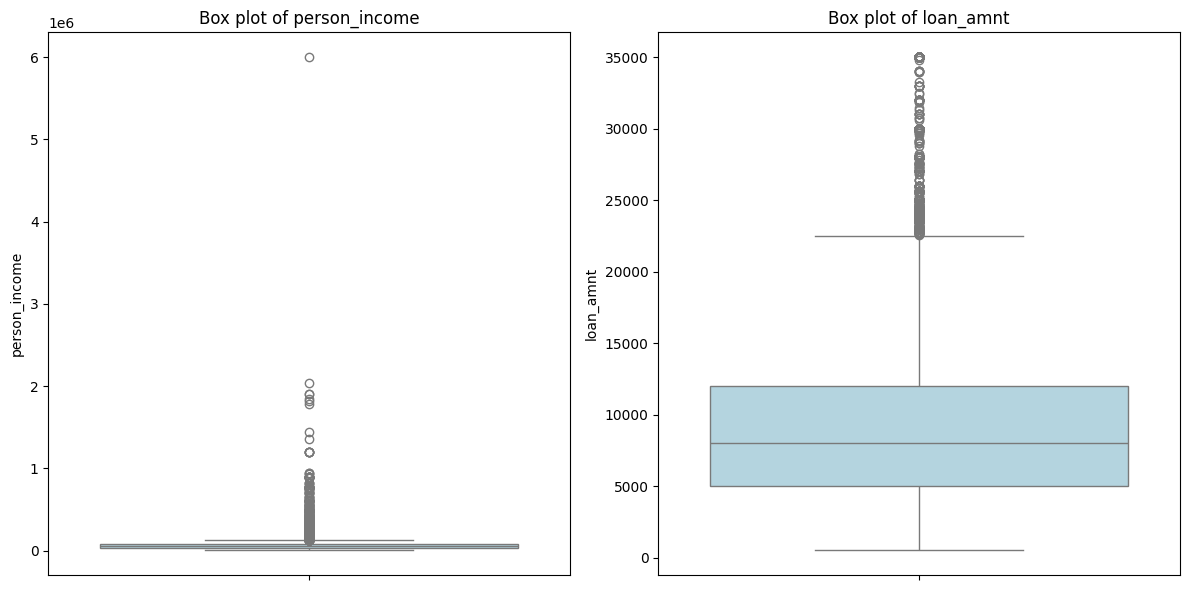

In [28]:
def  plot_boxplots(df, columns):
    plt.figure(figsize = (12,6))
    for i, col in enumerate(columns, 1):
        plt.subplot(1, len(columns), i)
        sns.boxplot(y= df[col], color = 'lightblue')
        plt.title(f'Box plot of {col}')
    plt.tight_layout()
    plt.show()

plot_boxplots(df_train, ['person_income', 'loan_amnt'])

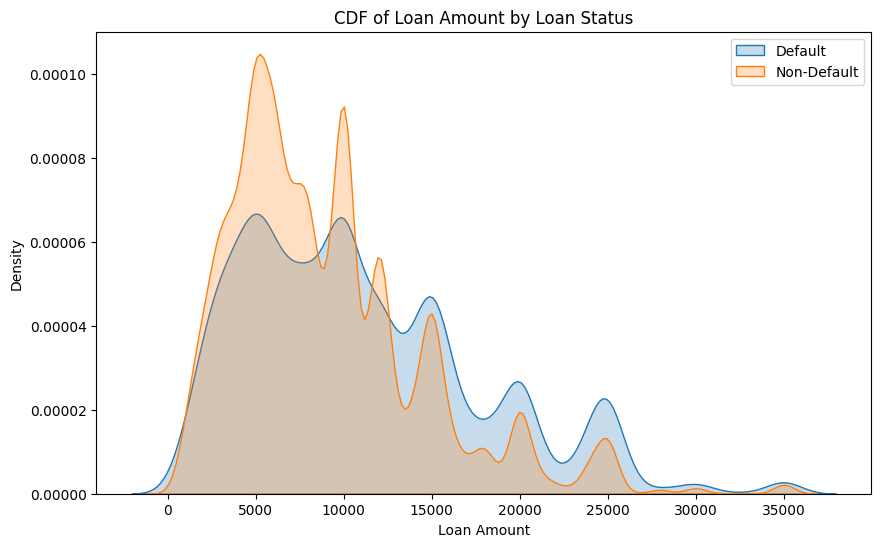

In [29]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df_train[df_train['loan_status'] == 1]['loan_amnt'], label='Default', fill=True)
sns.kdeplot(df_train[df_train['loan_status'] == 0]['loan_amnt'], label='Non-Default', fill=True)
plt.title('CDF of Loan Amount by Loan Status')
plt.xlabel('Loan Amount')
plt.ylabel('Density')
plt.legend()
plt.show()

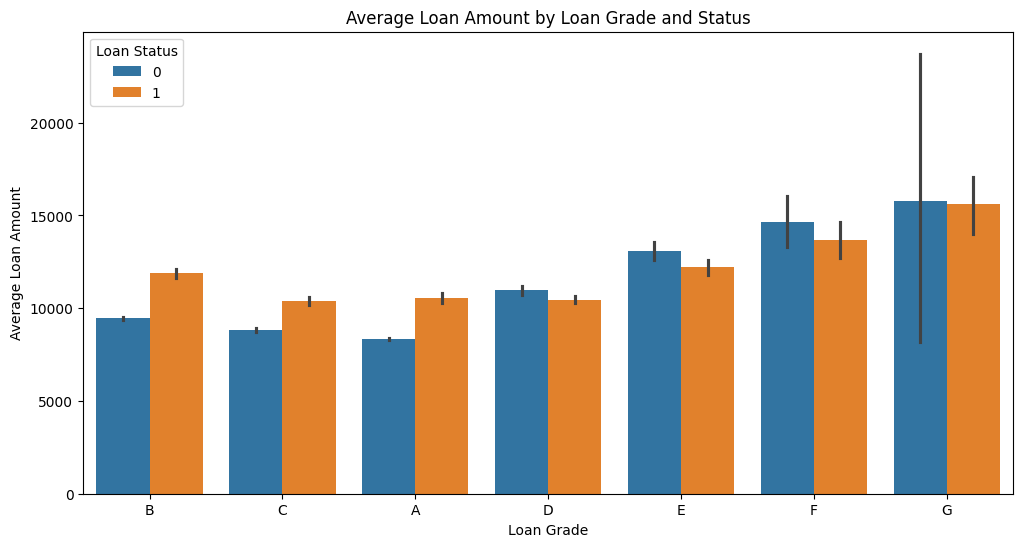

In [30]:
plt.figure(figsize=(12, 6))
sns.barplot(x='loan_grade', y='loan_amnt', hue='loan_status', data=df_train, estimator=np.mean)
plt.title('Average Loan Amount by Loan Grade and Status')
plt.xlabel('Loan Grade')
plt.ylabel('Average Loan Amount')
plt.legend(title='Loan Status')
plt.show()

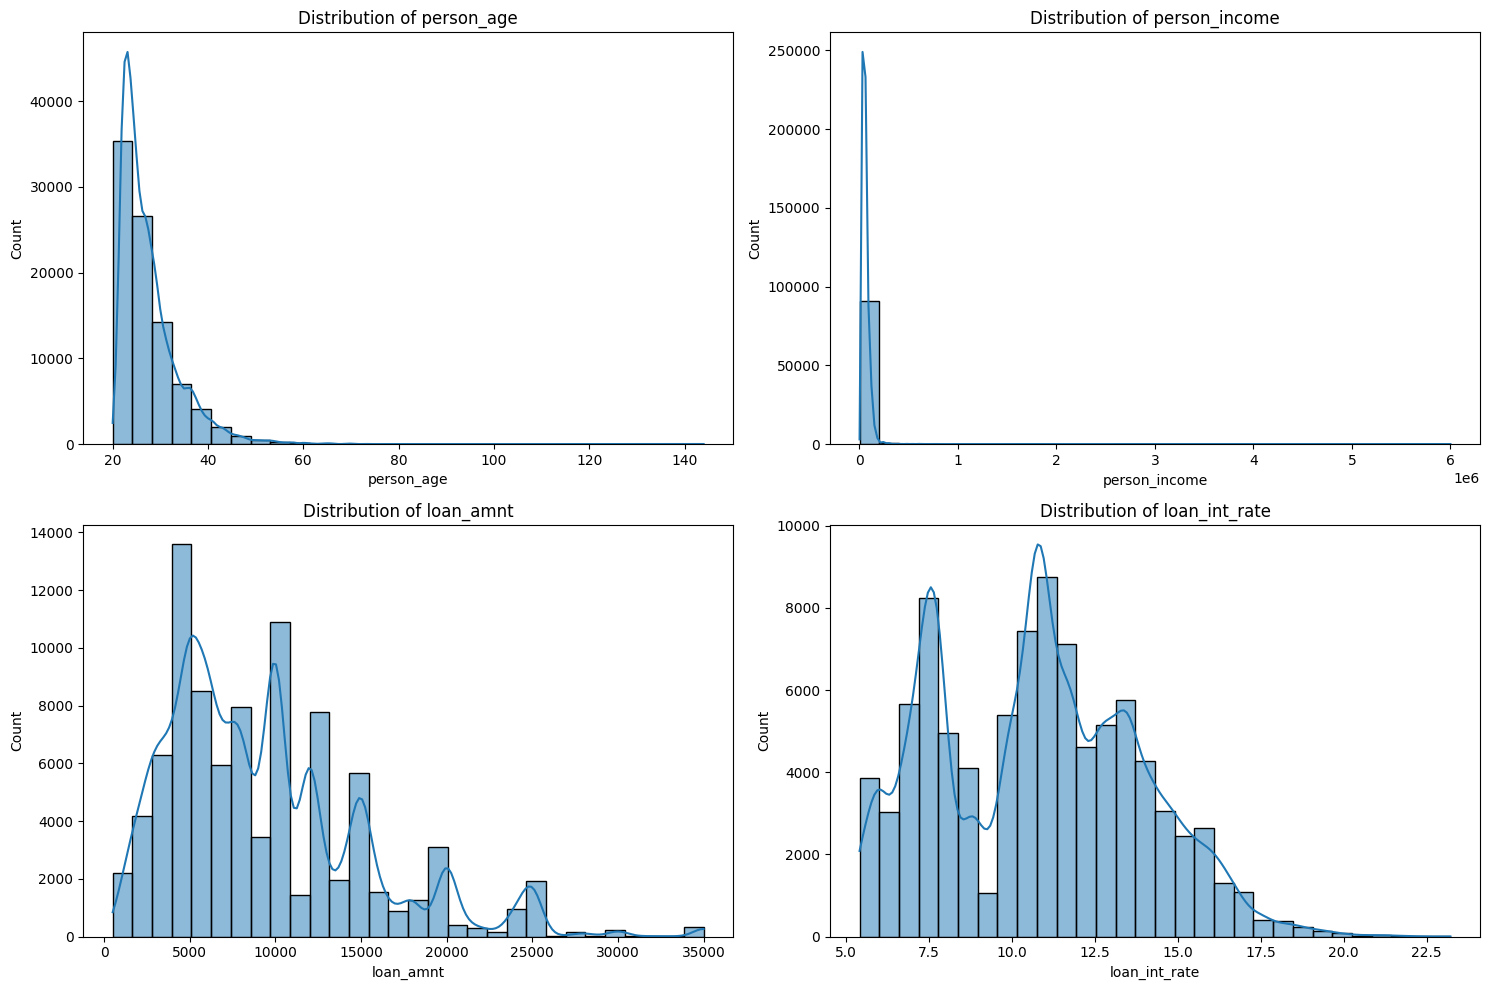

In [31]:
num_features = ['person_age', 'person_income', 'loan_amnt', 'loan_int_rate']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(num_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df_train[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

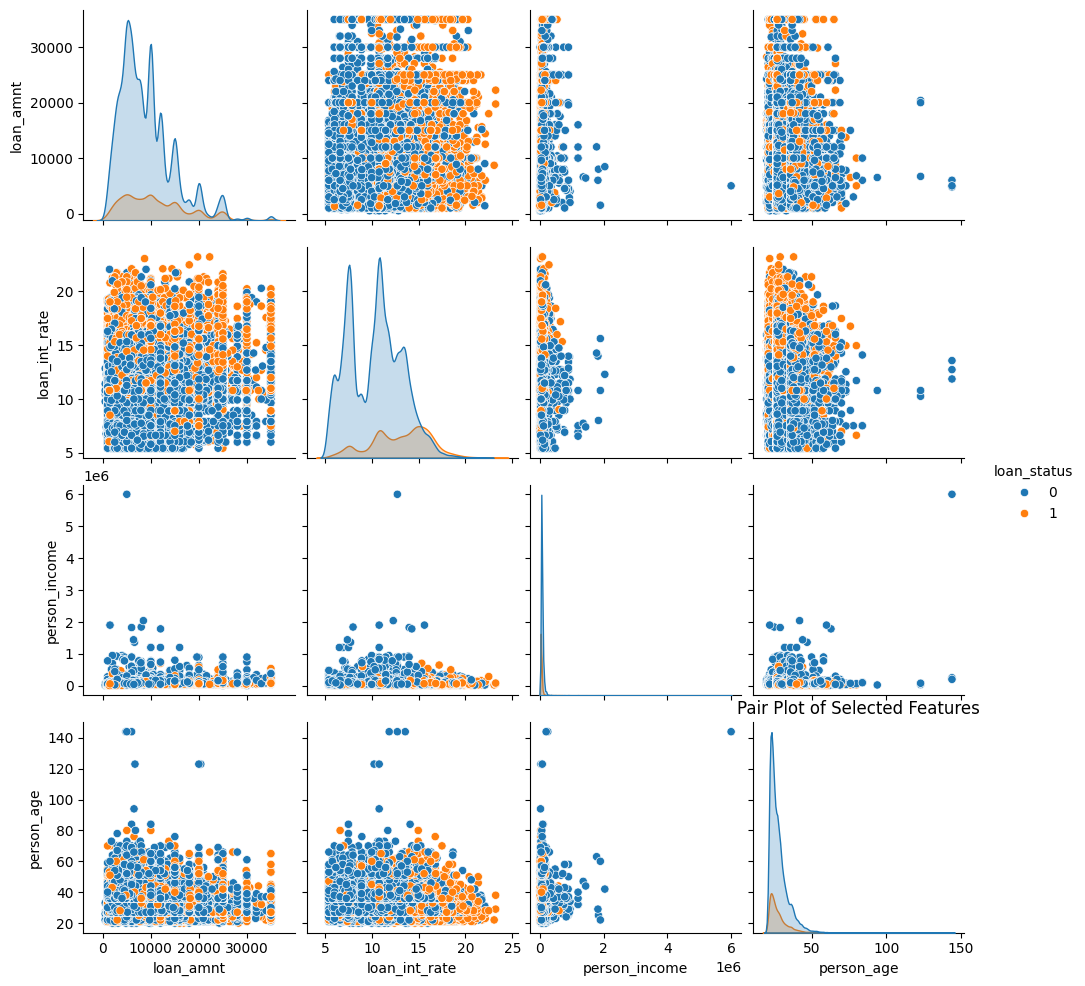

In [32]:
subset_features = ['loan_amnt', 'loan_int_rate', 'person_income', 'person_age', 'loan_status']
sns.pairplot(df_train[subset_features], hue='loan_status')
plt.title('Pair Plot of Selected Features')
plt.show()

In [33]:
from sklearn.preprocessing import LabelEncoder

def preprocess_data(df_train, df_test):  
    label_enc = LabelEncoder()   
    label_cols = ['person_home_ownership', 'loan_grade', 'cb_person_default_on_file']    
    for col in label_cols:
        df_train[col] = label_enc.fit_transform(df_train[col])
        df_test[col] = label_enc.transform(df_test[col])    
    df_train = pd.get_dummies(df_train, columns=['loan_intent'], drop_first=True)
    df_test = pd.get_dummies(df_test, columns=['loan_intent'], drop_first=True) 
    target_col = 'loan_status'
    train_columns = df_train.drop(columns=[target_col]).columns    
    df_test = df_test.reindex(columns=train_columns, fill_value=0)    
    return df_train, df_test

df_train_processed, df_test_processed = preprocess_data(df_train, df_test)

In [34]:
df_train = df_train_processed
df_test = df_test_processed

In [35]:
df_train.shape,df_test.shape


((91226, 16), (39098, 15))

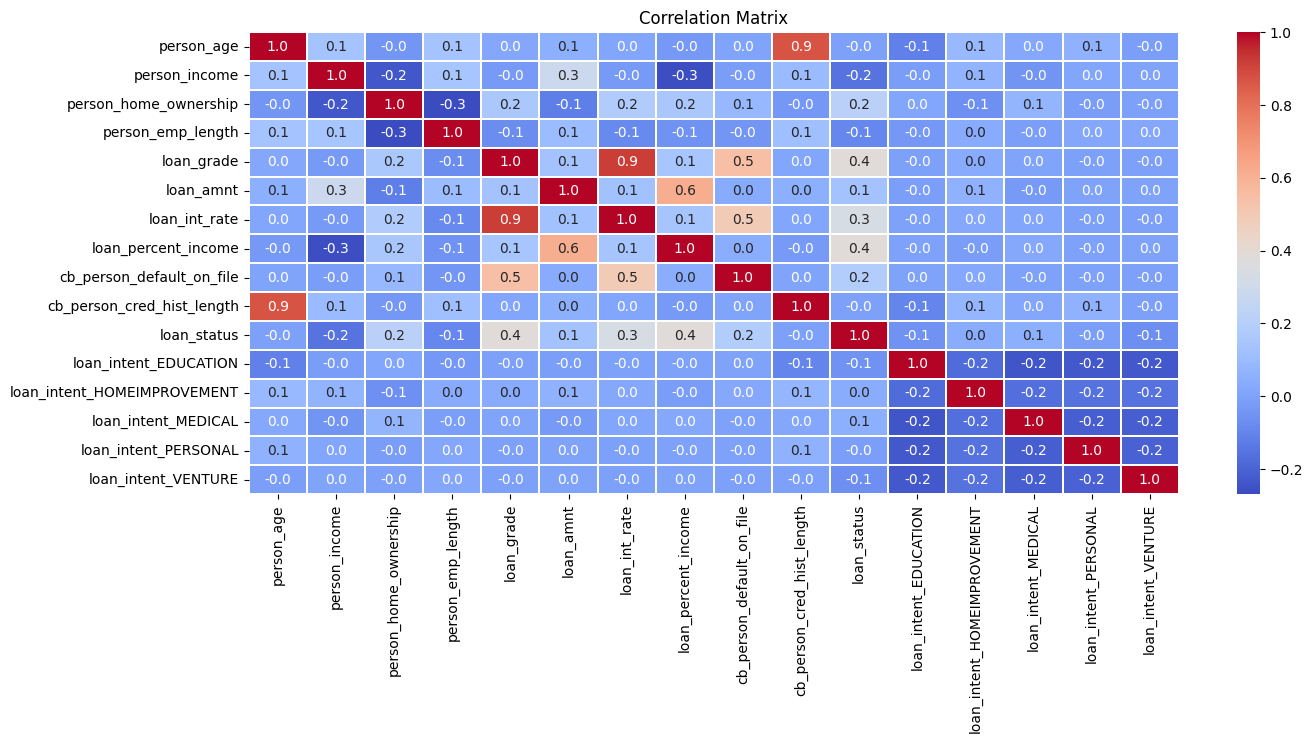

In [36]:
correlation_matrix = df_train.corr()
plt.figure(figsize=(15, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", linewidths=0.2)
plt.title('Correlation Matrix')
plt.show()

## Summary

### Age and Credit History
- Older individuals tend to have longer credit histories, indicating a **strong positive correlation** between age and credit history.

### Loan Grade and Interest Rate
- **Higher loan grades** are strongly associated with **lower interest rates**, reflecting loan risk. Better loan grades signify lower risk and thus result in lower interest rates.

### Loan Amount and Income
- **Larger loan amounts** represent a higher percentage of the borrower’s income.
- **Higher-income** individuals tend to borrow larger amounts, indicating a trend between loan amounts and income levels.

### Loan Default
- **Loan Grade & Interest Rate**: Higher loan grades and interest rates are linked to a **greater likelihood of default**.
- **Credit History**: Borrowers with a history of default generally have **worse loan grades**.
- **Income & Employment**: Higher-income individuals and those with **longer employment histories** are less likely to default.
- **Income Proportion**: A higher percentage of income spent on loans increases the **risk of default**.

### Loan Intent
- Loan intents like **education** and **home improvement** show **negative correlations** with loan defaults, suggesting borrowers tend to focus on specific purposes for their loans.

### Conclusion
- Factors such as **age, income, loan grade, interest rate**, and **loan intent** are important predictors of loan behavior, particularly **default risk**. Understanding these relationships is essential for predicting loan outcomes.

# Regression Analysis

In [37]:
df_train.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_grade', 'loan_amnt', 'loan_int_rate',
       'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE'],
      dtype='object')

In [38]:
df_test.isnull().sum()


person_age                     0
person_income                  0
person_home_ownership          0
person_emp_length              0
loan_grade                     0
loan_amnt                      0
loan_int_rate                  0
loan_percent_income            0
cb_person_default_on_file      0
cb_person_cred_hist_length     0
loan_intent_EDUCATION          0
loan_intent_HOMEIMPROVEMENT    0
loan_intent_MEDICAL            0
loan_intent_PERSONAL           0
loan_intent_VENTURE            0
dtype: int64

In [39]:
def feature_engineering(df):
    
    df['loan_to_income_ratio'] = df['loan_amnt'] / df['person_income']  
    df['financial_burden'] = df['loan_amnt'] * df['loan_int_rate'] 
    df['income_per_year_emp'] = df['person_income'] / (df['person_emp_length'])
    df['cred_hist_to_age_ratio'] = df['cb_person_cred_hist_length'] / df['person_age']
    df['int_to_loan_ratio'] = df['loan_int_rate'] / df['loan_amnt']
    df['loan_int_emp_interaction'] = df['loan_int_rate'] * df['person_emp_length']
    df['debt_to_credit_ratio'] = df['loan_amnt'] / df['cb_person_cred_hist_length'] 
    df['int_to_cred_hist'] = df['loan_int_rate'] / df['cb_person_cred_hist_length']  
    df['int_per_year_emp'] = df['loan_int_rate'] / (df['person_emp_length'])
    df['loan_amt_per_emp_year'] = df['loan_amnt'] / (df['person_emp_length'])      
    df['income_to_loan_ratio'] = df['person_income'] / df['loan_amnt'] 
    
    return df

#median_income = df_train['person_income'].median()
df_train = feature_engineering(df_train)
df_test = feature_engineering(df_test)

In [40]:
y = df_train['loan_status'] 
df_train = df_train.drop(['loan_status'],axis=1)
X = df_train

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_train_data = df_train
scaled_test_data = df_test

In [42]:
# pip install lightgbm


In [43]:

print("Hello")_
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold

lgb_params = {
    'objective': 'binary',
    'n_estimators': 3000,
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'random_state': 42,
    'learning_rate': 0.0322942967545754,
    'num_leaves': 24,
    'max_depth': 15,
    'min_data_in_leaf': 25,  
    'feature_fraction': 0.6236144085285287, 
    'bagging_fraction': 0.9596685778433888, 
    'bagging_freq': 3,  
    'verbose': -1
}

n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
lgbm_predictions = np.zeros(len(scaled_train_data))
lgbm_true_labels = np.zeros(len(scaled_train_data))
lgbm_test_predictions = np.zeros(len(scaled_test_data))

for fold, (train_idx, val_idx) in enumerate(skf.split(scaled_train_data, y)):
    X_train, X_val = scaled_train_data.iloc[train_idx], scaled_train_data.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]    
   
    lgbm_model = LGBMClassifier(**lgb_params)
    lgbm_model.fit(X_train, y_train,
                   eval_set=[(X_val, y_val)],
                   eval_metric='auc',
                   early_stopping_rounds=10,
                   verbose=False)    

    lgbm_fold_preds = lgbm_model.predict_proba(X_val)[:, 1]  
    lgbm_fold_test_preds = lgbm_model.predict_proba(scaled_test_data)[:, 1]   
    lgbm_predictions[val_idx] = lgbm_fold_preds
    lgbm_true_labels[val_idx] = y_val    
    lgbm_test_predictions += lgbm_fold_test_preds / n_splits
overall_metric_lgbm = roc_auc_score(lgbm_true_labels, lgbm_predictions)
print("Overall AUC (LGBMClassifier with StratifiedKFold):", overall_metric_lgbm)

SyntaxError: invalid syntax (3575987586.py, line 1)

In [ ]:
catboost_params = {
    'depth': 7,
    'learning_rate': 0.19893301995319765,
    'bagging_temperature': 0.7979373495258176,
    'l2_leaf_reg': 5,
    'loss_function': 'Logloss',
    'iterations': 400,
    'grow_policy': 'Lossguide',
    'eval_metric': 'AUC',
}

n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

catboost_predictions = np.zeros(len(scaled_train_data))
catboost_true_labels = np.zeros(len(scaled_train_data))
catboost_test_predictions = np.zeros(len(scaled_test_data))

for fold, (train_idx, val_idx) in enumerate(skf.split(scaled_train_data, y)):
    X_train, X_val = scaled_train_data.iloc[train_idx], scaled_train_data.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    catboost_model = CatBoostClassifier(**catboost_params)
    catboost_model.fit(X_train, y_train,
                       eval_set=(X_val, y_val),
                       early_stopping_rounds=10,
                       verbose=True)
  
    catboost_fold_preds = catboost_model.predict_proba(X_val)[:, 1]  
    catboost_fold_test_preds = catboost_model.predict_proba(scaled_test_data)[:, 1]  
    catboost_predictions[val_idx] = catboost_fold_preds
    catboost_true_labels[val_idx] = y_val    
    catboost_test_predictions += catboost_fold_test_preds / n_splits
overall_metric_catboost = roc_auc_score(catboost_true_labels, catboost_predictions)
print("Overall AUC (CatBoostClassifier with StratifiedKFold):", overall_metric_catboost)